# Dataset used is available at:
https://www.kaggle.com/elakiricoder/gender-classification-dataset

# - Import the libraries that will be used

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# - Import the gender_classification dataset and explore data

In [2]:
gender_df = pd.read_csv('gender_classification_v7.csv')

In [3]:
gender_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## - Visualize percentage of each class in dataset 

C:\Users\salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

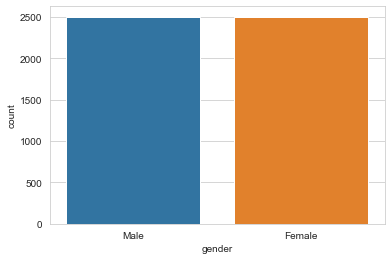

In [5]:
sns.countplot(gender_df['gender'], label = "Count")


 ## - plot correlation between features to check if there are obvious dimensions to be removed

<AxesSubplot:>

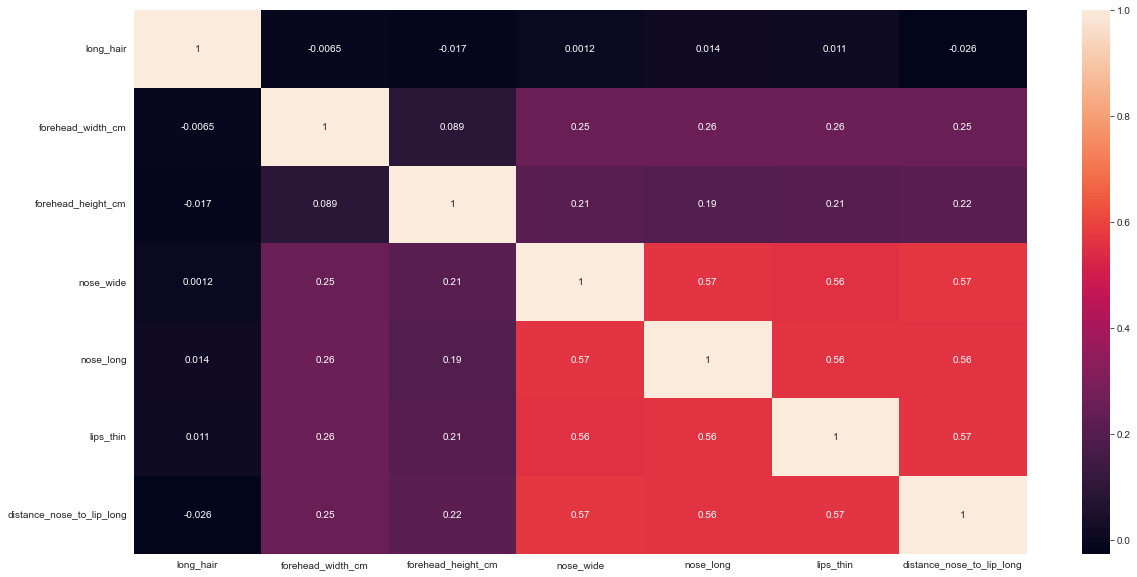

In [6]:
plt.figure(figsize=(20,10)) 
sns.heatmap(gender_df.corr(), annot=True)

### - Highest correlation is 0.57
    - We start applying PCA by normalizing the data so that the mean is 0 and the variance is 1 for all features
    - We get all possible principal components for dataset to check the variance that each component adds

In [20]:
X = gender_df.drop('gender', axis = 1)
y = gender_df.gender
std_X = StandardScaler().fit_transform(X) # normalizing the data 

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(std_X)
y = y.replace('Male', 0)
y = y.replace('Female', 1)
y

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64

## - We check the mean and variance before and after normalizing using sklearn's StandardScaler() 

Before:

In [21]:
X.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


After:

In [22]:
std_X.mean(), std_X.std()

(-1.274661747814274e-16, 1.0)

## - Plot the variance ratio for each principal components to determine how many components to include in training

([<matplotlib.axis.XTick at 0x1d188d04100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

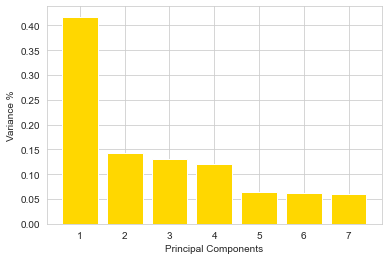

In [23]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

## - Split the dataset into training and testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.3, random_state=42)


## - Search for the best hyperparameters for the support vector machine model and print the results of the search

In [12]:

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': [ 'linear', 'poly', 'rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.969 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.971 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.976 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.966 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.966 total time=   0.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.974 total time=   0.1s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.970 total time=   0.1s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.973 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.964 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.974 total time=   0.0s
[CV 4/5] END ......C=10, gam

## - Build SVM model with the best hyperparameters and all principal components and print time, accuracy and f1_score
Note: Run the last cell with definition of the evaluation function

In [25]:
begin = time.time()
original_model = SVC(kernel='rbf', degree=2, gamma=1, coef0=1, C=1)
original_model.fit(X_train, y_train)
print_score(original_model, X_train, y_train, X_test, y_test, train=True)
print_score(original_model, X_train, y_train, X_test, y_test, train=False)
end = time.time()

print(f"time taken to fit model: {end - begin}")

Train Result:n================================================
[[1708   30]
 [  24 1738]]
Accuracy0.9845714285714285
f1: 0.9847025495750709
Test Result:n================================================
[[730  32]
 [ 24 715]]
Accuracy0.9626915389740173
f1: 0.9623149394347242
time taken to fit model: 0.690826416015625


## - Build SVM model with best hyperparameters and one principal component and print time

In [26]:
pca_gender = PCA(n_components = 1)
X_train_one = pca_gender.fit_transform(X_train)
X_test_one = pca_gender.transform(X_test)

In [27]:
begin = time.time()
first_model = SVC(kernel='rbf', degree=2, gamma=1, coef0=1, C=1)
first_model.fit(X_train_one, y_train)
print_score(first_model, X_train_one, y_train, X_test_one, y_test, train=True)
print_score(first_model, X_train_one, y_train, X_test_one, y_test, train=False)
end = time.time()

print(f"time taken to fit model: {end - begin}")

Train Result:n================================================
[[1679   59]
 [  41 1721]]
Accuracy0.9714285714285714
f1: 0.9717673630717109
Test Result:n================================================
[[731  31]
 [ 21 718]]
Accuracy0.9653564290473018
f1: 0.9650537634408602
time taken to fit model: 0.3621859550476074


## - Build SVM model with two principal components

In [30]:
pca_gender = PCA(n_components = 2)
X_train_two = pca_gender.fit_transform(X_train)
X_test_two = pca_gender.transform(X_test)

In [31]:
begin = time.time()
second_model = SVC(kernel='rbf', degree=2, gamma=1, coef0=1, C=1)
second_model.fit(X_train_two, y_train)
print_score(second_model, X_train_two, y_train, X_test_two, y_test, train=True)
print_score(second_model, X_train_two, y_train, X_test_two, y_test, train=False)
end = time.time()

print(f"time taken to fit model: {end - begin}")

Train Result:n================================================
[[1680   58]
 [  43 1719]]
Accuracy0.9711428571428572
f1: 0.9714608646510313
Test Result:n================================================
[[733  29]
 [ 23 716]]
Accuracy0.9653564290473018
f1: 0.9649595687331537
time taken to fit model: 0.28285861015319824


## - Build SVM model with three principal components

In [32]:
pca_gender = PCA(n_components = 3)
X_train_three = pca_gender.fit_transform(X_train)
X_test_three = pca_gender.transform(X_test)

In [33]:
begin = time.time()
third_model = SVC(kernel='rbf', degree=2, gamma=1, coef0=1, C=1)
third_model.fit(X_train_three, y_train)
print_score(third_model, X_train_three, y_train, X_test_three, y_test, train=True)
print_score(third_model, X_train_three, y_train, X_test_three, y_test, train=False)
end = time.time()

print(f"time taken to fit model: {end - begin}")

Train Result:n================================================
[[1683   55]
 [  29 1733]]
Accuracy0.976
f1: 0.976338028169014
Test Result:n================================================
[[733  29]
 [ 15 724]]
Accuracy0.9706862091938707
f1: 0.9705093833780162
time taken to fit model: 0.32982826232910156


## I would go with the model with three principal components based on the variance graph and the previous models

In [14]:
def print_score(f_model, X_train, y_train, X_test, y_test, train=True):
    if train:
        y_pred = f_model.predict(X_train)
        print("Train Result:n================================================")
        
        cm = confusion_matrix(y_train, y_pred)
        print(cm)
        print('Accuracy' + str(accuracy_score(y_train, y_pred)))
        print('f1: ' + str(f1_score(y_train, y_pred)))
    elif train==False:
        y_pred = f_model.predict(X_test)
        print("Test Result:n================================================")        
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        print('Accuracy' + str(accuracy_score(y_test, y_pred)))
        print('f1: ' + str(f1_score(y_test, y_pred)))